
# Pytorch一小时入门

- toc: true
- branch: master
- badges: true
- use_math: true
- comments: true
- categories: [jupyter,pytorch]
- description: 抄写一遍Pytorch入门代码
---


> 更新记录：
>> 20/05/31(I) 完成前两节（30min）的内容

学习了[DEEP LEARNING WITH PYTORCH: A 60 MINUTE BLITZ
](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)，将过程记录在此处。

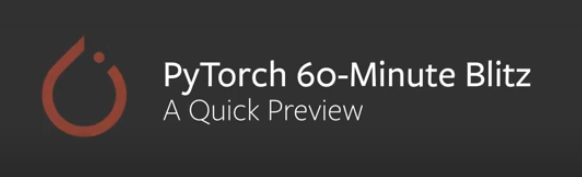

* 1.理解PyTorch的Tensor库
* 2.Autograd自动求导的应用
* 3.构建神经网络
* 4.一个实际的例子

# 理解PyTorch的Tensor库

## Tesnsor的定义
Tensors和NumPy的ndarray结构很像，区别是Tensor可以用于GPU计算。

In [1]:
from __future__ import print_function
import torch

# check the GPU support
dir(torch.cuda)

['BFloat16Storage',
 'BFloat16Tensor',
 'BoolStorage',
 'BoolTensor',
 'ByteStorage',
 'ByteTensor',
 'CharStorage',
 'CharTensor',
 'CudaError',
 'DeferredCudaCallError',
 'DoubleStorage',
 'DoubleTensor',
 'Event',
 'FloatStorage',
 'FloatTensor',
 'HalfStorage',
 'HalfTensor',
 'IntStorage',
 'IntTensor',
 'LongStorage',
 'LongTensor',
 'PIPE',
 'Popen',
 'ShortStorage',
 'ShortTensor',
 'Stream',
 '_CudaBase',
 '_StorageBase',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_after_fork',
 '_check_capability',
 '_check_driver',
 '_cudart',
 '_dummy_type',
 '_free_mutex',
 '_get_device_index',
 '_host_allocator',
 '_in_bad_fork',
 '_initialized',
 '_lazy_call',
 '_lazy_init',
 '_lazy_new',
 '_load_cudart',
 '_original_pid',
 '_queued_calls',
 '_register_after_fork',
 '_sleep',
 '_utils',
 'check_error',
 'comm',
 'contextlib',
 'ctypes',
 'cudaStatus',
 'cudart',
 'current_blas_handle',
 'current_device'

In [3]:
assert(torch.cuda.is_available())

> 创建一个5x3张量，不初始化

In [4]:
x=torch.empty(5,3)
print(x)

tensor([[ 8.4078e-45,  0.0000e+00,  2.6136e-28],
        [ 5.5772e-43, -1.3120e-30,  4.5915e-41],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-1.3120e-30,  4.5915e-41,  0.0000e+00]])


**???这里的表现和页面不一样，预期应该是全0才对**

> 创建一个随机初始化张量

In [5]:
x=torch.rand(5,3)
print(x)

tensor([[0.3783, 0.4491, 0.0897],
        [0.2913, 0.1618, 0.6047],
        [0.2112, 0.3987, 0.1202],
        [0.8236, 0.2970, 0.4896],
        [0.4792, 0.2471, 0.6751]])


> 创建一个填0的long型张量

In [9]:
x=torch.zeros(5,3,dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


> 从数据中直接创建一个张量

In [10]:
x=torch.tensor([5.5,3.0])
print(x)

tensor([5.5000, 3.0000])


> 根据一个已有张量创建张量

In [12]:
# 创建一个类型变为double型的全1张量
x=x.new_ones(5,3,dtype=torch.double)
print(x)

x=torch.randn_like(x,dtype=torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.4722, -0.4380, -1.0941],
        [ 0.6054,  0.6555, -1.1304],
        [-1.1721,  1.3889,  0.3657],
        [-1.6273, -0.0502,  0.8097],
        [ 1.3560,  0.1341,  1.6279]])


> torch.size实际是一个tuple

In [13]:
print(x.size())
print(x.size()[0])

torch.Size([5, 3])
5


## Tensor操作

> 加法之两种符号类型

In [14]:
# 类型1- 直接用加号
x = torch.ones(5,3)
y = torch.zeros(5,3)
print(x + y)

# 类型2- 使用函数add
print(torch.add(x,y))


tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


**？？？为何要用两种符号表示呢**

> 加法之指定结果tensor

In [16]:
result = torch.empty(5,3)
torch.add(x,y,out=result)
print(result)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


> 加法之原位相加

In [17]:
y.add_(x)
print(y)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


*注意到所有原位运算都是在函数名后边加一个下划线*

> 使用类似numpy的范围写法取tensor的部分值

In [20]:
# 打印x的第一列
print(x[:,1])

# 打印x的第一行
print(x[1,:])

tensor([1., 1., 1., 1., 1.])
tensor([1., 1., 1.])


> 改变tensor的维度

In [21]:
x = torch.randn(4,4)
y = x.view(16)
# 只指定每行的元素数量，就可以计算出变换后的形状
z = x.view(-1, 2)
print(x,y,z)

tensor([[ 1.7866,  1.8163, -0.4897,  0.6796],
        [-1.1594,  1.8653, -0.4756, -0.8084],
        [ 0.5253,  1.8867,  1.2337, -0.1705],
        [ 0.6688,  0.0531, -0.9582, -0.4612]]) tensor([ 1.7866,  1.8163, -0.4897,  0.6796, -1.1594,  1.8653, -0.4756, -0.8084,
         0.5253,  1.8867,  1.2337, -0.1705,  0.6688,  0.0531, -0.9582, -0.4612]) tensor([[ 1.7866,  1.8163],
        [-0.4897,  0.6796],
        [-1.1594,  1.8653],
        [-0.4756, -0.8084],
        [ 0.5253,  1.8867],
        [ 1.2337, -0.1705],
        [ 0.6688,  0.0531],
        [-0.9582, -0.4612]])


*tensor的操作还有很多，此处实际没有完全列举* 

## Numpy桥接 - 在tensor与numpy数组之间互相转换

numpy数组和tensor共享内存：这意味着对任何一个变量的改变都将同步到另一个上。

> 转化tensor为一个ndarray

In [22]:
a=torch.ones(5)
b=a.numpy()
print(a,b)

tensor([1., 1., 1., 1., 1.]) [1. 1. 1. 1. 1.]


> 对tensor的改变将会反映到ndarray上

In [25]:
a.add_(a)
print(b)

[2. 2. 2. 2. 2.]


> 对ndarray的改变将会反映到tensor上

In [26]:
b+=1
print(a)

tensor([3., 3., 3., 3., 3.])


> 将ndarray转换为tensor

In [27]:
import numpy as np
a = np.ones(5) #注意此处的变量命名
b = torch.from_numpy(a)
np.add(a,1,out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## GPU上的tensor

> 使用to()方法将tensor迁移到其它设备

In [30]:
device = torch.device("cuda")
y = torch.ones_like(x, device=device)
x = x.to(device)
z = x + y
print(z)
print(z.to("cpu", torch.int))

tensor([[ 2.7866,  2.8163,  0.5103,  1.6796],
        [-0.1594,  2.8653,  0.5244,  0.1916],
        [ 1.5253,  2.8867,  2.2337,  0.8295],
        [ 1.6688,  1.0531,  0.0418,  0.5388]], device='cuda:0')
tensor([[2, 2, 0, 1],
        [0, 2, 0, 0],
        [1, 2, 2, 0],
        [1, 1, 0, 0]], dtype=torch.int32)


# Autograd自动求导的应用

pytorch中神经网络的核心模块就是`autograd`包，我们简单地了解一下这个包，其后就可以开始训练我们的第一个神经网络了。

`autograd`包可以对所有的tensor操作进行自动差分（？？？如何自定义运算符）。它是一个define-by-run的框架，也就是你的反向传播是由代码运行方式所决定的，每一个操作都会有不同。

我们用更简单的方式和例子进行解释。

## tensor

`torch.Tensor`是这个包的核心。如果你将其属性`.requires_grad`设为True，它将追踪其上的所有操作。当你完成计算后，可以调用`.backward()`方法以自动计算所有导数。这个tensor的导数将由`.grad`参数所体现。

为了结束对一个tensor求导的操作，你可以用`.detach`方法将它从计算历史中移除，以避免之后它又被继续求导。

为了避免对tensor求导占用内存，你可以将代码块用`with torch.no_grad()`包裹起来。这对模型评估尤其有用，因为其中可能存在设置了`require_grad=True`的参数，但我们却不需要求导数。

`Function`类是另外一个非常常用的类。

`Tensor`和`Function`共同作用以构建一个无环图，该图对完整的计算历史进行编码。每个tensor都有一个`.grad_fn`属性，其中保存了创建这个tensor的`Function`对象。（用户自己创建的tensor则没有这个属性）

如果你想计算导数，你可以调用tensor的`.backward()`方法。如果tensor是一个标量（即包含单个元素），你不需要为`backward()`指定任何参数。但如果它有多于一个元素，则你必需为它指定`gradient`参数，其形状与该tensor对应。





> 创建一个tensor并设定`require_grad`为True以追踪其上的计算：

In [33]:
x = torch.ones(2,2,requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


> tensor运算

In [34]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


> 更多的tensor运算

In [35]:

z = y * y * 3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


> `.requires_grad_()`可用于替换一个已有tensor的`require_grad`标志位。输入标志位默认为`False`。

In [40]:
a = torch.randn(2,2)
a=((a*3)/(a-1))
print(a.requires_grad)
print(a.grad_fn)
a.requires_grad_(True)
print(a.requires_grad)
print(a.grad_fn)
b=(a*a).sum()
print(b.grad_fn)

False
None
True
None


> 进行反向传播。由于`out`是一个标量，所以无需传入参数

In [41]:
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


如果我们将out定义为$o$,那么我们将有$o=\frac{1}{4}\sum_{i}3(x_i+2)^2$,此时$\frac{\partial o}{\partial x_i}=\frac{3}{2}(x_i+2)$,因此$\frac{\partial o}{\partial x_i} \mid_{{x_i}=1}=4.5$

数学上来说，如果你有一个因自变量都为向量的函数$\vec{y}=f(\vec{x})$,那么$\vec{y}$对$\vec{x}$的导数为一个雅可比矩阵：

$J=\left(\begin{array}{ccc}
\frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}} \\
\vdots & \ddots & \vdots \\
\frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
\end{array}\right)$

一般地，`torch.autograd`是一个用于计算向量-雅可比行列式乘积的工具。也就是说，给定任何向量$v=(v_1 v_2 ... v_m)^T$，如果$v$刚好是标量函数$l=g(\vec{y})$的导数，也就是说$v=\left(\frac{\partial l}{\partial y_{1}} \cdots \frac{\partial l}{\partial y_{m}}\right)^{T}$，那么根据链式法则有向量与雅克比行列式之积为
$J^{T} \cdot v=\left(\begin{array}{ccc}
\frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}} \\
\vdots & \ddots & \vdots \\
\frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
\end{array}\right)\left(\begin{array}{c}
\frac{\partial l}{\partial y_{1}} \\
\frac{\partial l}{\partial y_{m}}
\end{array}\right)=\left(\begin{array}{c}
\frac{\partial l}{\partial x_{1}} \\
\frac{\partial l}{\partial x_{n}}
\end{array}\right)$

向量与雅克比行列式之积的这种性质使得，将额外的导数引入输出不为常量的模型非常方便。
现在我们看一下向量-雅克比积的一个例子：

In [44]:
x = torch.randn(3, requires_grad=True)
y = x * 2

while y.data.norm()<1000:
    y=y*2

print(y)

tensor([-800.3267,  194.5804,  608.2095], grad_fn=<MulBackward0>)


在这个例子中`y`不再是一个标量了。`torch.autograd`不能直接计算完整的雅克比行列式，但如果我们只想要向量-雅克比行列式之积的话，就简单将向量传入`backward`参数即可：

In [45]:
v = torch.tensor([0.1,1.0,0.0001], dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


> 关于上面这一段[知乎链接](https://zhuanlan.zhihu.com/p/29923090)讲的比较清楚，主要动机是不允许tensor对tensor求导，只允许scalar对tensor求导。

如果想对已经设置`requires_grad=True`的张量停止自动求导，有两种方式：

1.使用`with torch.no_grad()`包裹

2.使用`.detach()`获取一个新的不需导数的张量

In [46]:
print(x.requires_grad)
print((x**2).requires_grad)
with torch.no_grad():
    print((x**2).requires_grad)
    
print(x.requires_grad)
y=x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
True
False
True
False
tensor(True)
